# Fixed value of ρ and different values of a

ρ = 0.5
<br>
a = 0.1, 0.5, 1, 2, 3, 5

In [34]:
from implementation.LDA import LDA
from implementation.QDA import QDA
from implementation.NB import NB
from implementation.dataset_generation import generate_dataset1, generate_dataset2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

### scheme 1

In [ ]:
results_scheme1 = {'LDA': [], 'QDA': [], 'NB': []}
a_values = [0.1, 0.5, 1, 2, 3, 5]


for a_value in a_values:
    for _ in range(1000):
        X_data, y_data = generate_dataset1(a=a_value)
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

        lda = LDA()
        qda = QDA()
        nb = NB()

        lda.fit(X_train, y_train)
        qda.fit(X_train, y_train)
        nb.fit(X_train, y_train)

        y_pred_lda = lda.predict(X_test)
        y_pred_qda = qda.predict(X_test)
        y_pred_nb = nb.predict(X_test)

        results_scheme1['LDA'].append((accuracy_score(y_test, y_pred_lda), a_value))
        results_scheme1['QDA'].append((accuracy_score(y_test, y_pred_qda), a_value))
        results_scheme1['NB'].append((accuracy_score(y_test, y_pred_nb), a_value))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB for different a values (Schema 1)')

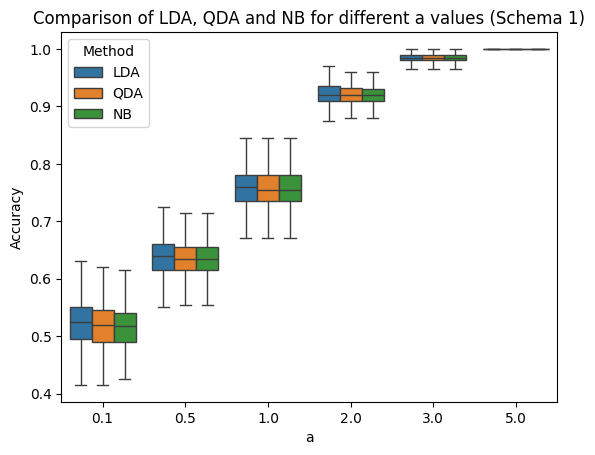

In [ ]:
data = []
for method in results_scheme1:
    data.extend([(method, acc, a) for acc, a in results_scheme1[method]])

df = pd.DataFrame(data, columns=['Method', 'Accuracy', 'a'])

sns.boxplot(x='a', y='Accuracy', hue='Method', data=df, showfliers=False).set_title('Comparison of LDA, QDA and NB for different a values (scheme 1)')

### scheme 2

In [ ]:
results_scheme2 = {'LDA': [], 'QDA': [], 'NB': []}
ro = 0.5
a_values = [0.1, 0.5, 1, 2, 3, 5]


for a_value in a_values:
    for _ in range(1000):
        X_data, y_data = generate_dataset2(a=a_value, ro=ro)
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

        lda = LDA()
        qda = QDA()
        nb = NB()

        lda.fit(X_train, y_train)
        qda.fit(X_train, y_train)
        nb.fit(X_train, y_train)

        y_pred_lda = lda.predict(X_test)
        y_pred_qda = qda.predict(X_test)
        y_pred_nb = nb.predict(X_test)

        results_scheme2['LDA'].append((accuracy_score(y_test, y_pred_lda), a_value))
        results_scheme2['QDA'].append((accuracy_score(y_test, y_pred_qda), a_value))
        results_scheme2['NB'].append((accuracy_score(y_test, y_pred_nb), a_value))

Text(0.5, 1.0, 'Comparison of LDA, QDA and NB for different a values (Schema 2)')

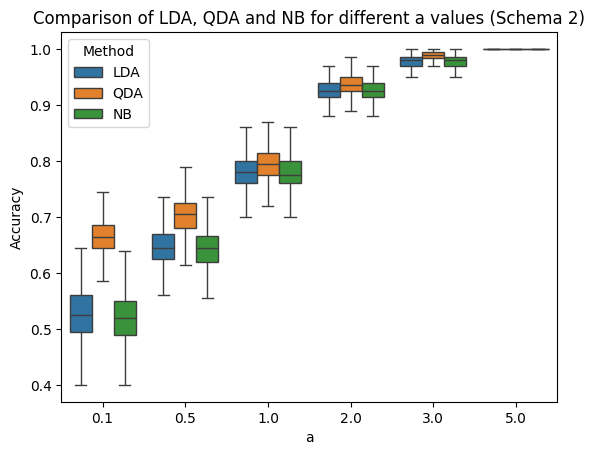

In [ ]:
data = []
for method in results_scheme2:
    data.extend([(method, acc, a) for acc, a in results_scheme2[method]])

df = pd.DataFrame(data, columns=['Method', 'Accuracy', 'a'])

sns.boxplot(x='a', y='Accuracy', hue='Method', data=df, showfliers=False).set_title('Comparison of LDA, QDA and NB for different a values (scheme 2)')